**Limpieza_dataset_EcoEnergy Solutions **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler

#Archivos
uploaded = files.upload()

#Dataset
df = pd.read_csv("ecoenergy_consumption_data.csv")

Saving ecoenergy_consumption_data.csv to ecoenergy_consumption_data (2).csv


In [ ]:
#Exploración Dataset
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   client_id                    10000 non-null  int64  
 1   client_name                  10000 non-null  object 
 2   region                       10000 non-null  object 
 3   contract_type                10000 non-null  object 
 4   consumption_kwh              10000 non-null  int64  
 5   billing_date                 10000 non-null  object 
 6   co2_emissions                10000 non-null  float64
 7   cost_per_kwh                 10000 non-null  float64
 8   total_cost                   10000 non-null  float64
 9   renewable_energy_percentage  10000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


,client_id,consumption_kwh,co2_emissions,cost_per_kwh,total_cost,renewable_energy_percentage
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5051.087500,1019.702840,0.174928,886.023571,49.113500
std,2886.89568,2867.303781,563.427136,0.043951,565.830649,28.812154
min,1.00000,100.000000,50.040000,0.100000,10.000000,0.000000
25%,2500.75000,2588.000000,536.412500,0.140000,418.455000,24.000000
50%,5000.50000,5032.500000,1020.240000,0.180000,818.625000,49.000000
75%,7500.25000,7542.250000,1510.840000,0.210000,1276.492500,74.000000
max,10000.00000,9999.000000,1999.940000,0.250000,2497.500000,99.000000


In [ ]:
#Datos nulos
df.isnull().sum()

,0
client_id,0
client_name,0
region,0
contract_type,0
consumption_kwh,0
billing_date,0
co2_emissions,0
cost_per_kwh,0
total_cost,0
renewable_energy_percentage,0


El dataset contiene 10000 registros y 10 columnas. Se cambiará el formato de billing_date(string) a datetime.
No se han detectado nulos,por lo que no es preciso limpiar los datos.

In [ ]:
#Normalizar fechas

df["billing_date"] = pd.to_datetime(df["billing_date"])

df["year"] = df["billing_date"].dt.year
df["month"] = df["billing_date"].dt.month


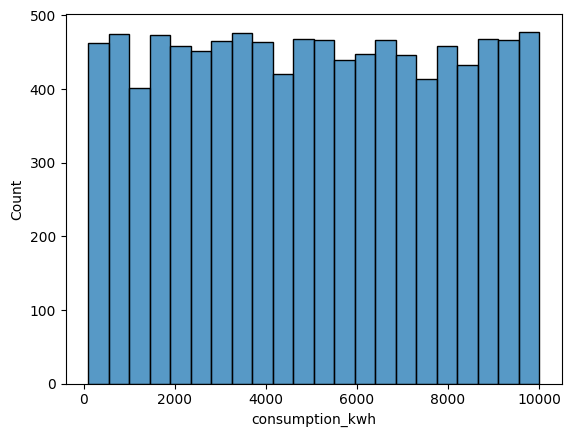

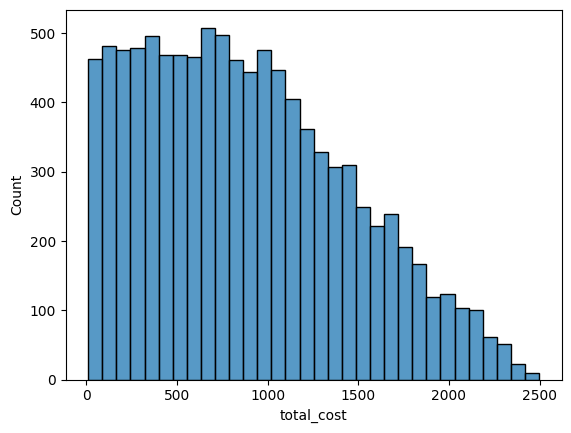

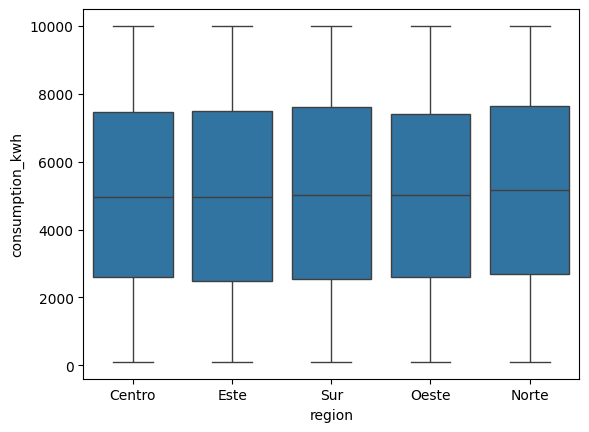

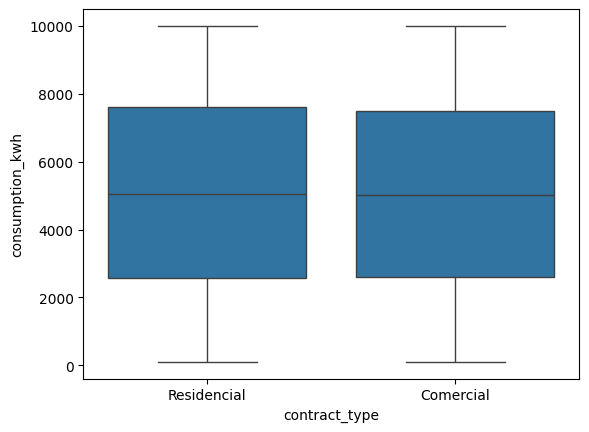

In [ ]:
#Búsqueda de patrones

##Distribución del consumo

sns.histplot(df["consumption_kwh"])
plt.show()

##Coste total

sns.histplot(df["total_cost"])
plt.show()

##Consumo por región

sns.boxplot(x="region", y="consumption_kwh", data=df)
plt.show()

##Contrato vs Consumo

sns.boxplot(x="contract_type", y="consumption_kwh", data=df)
plt.show()

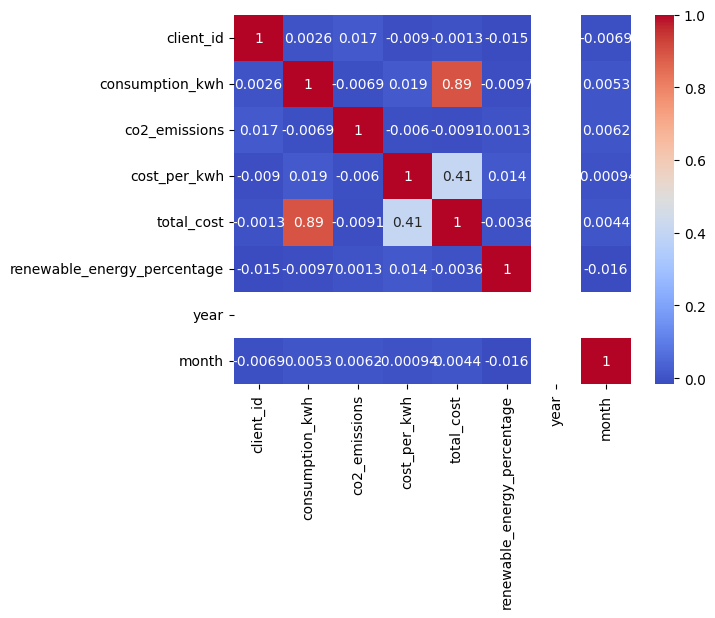

In [ ]:
#Búsqueda de correlaciones

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

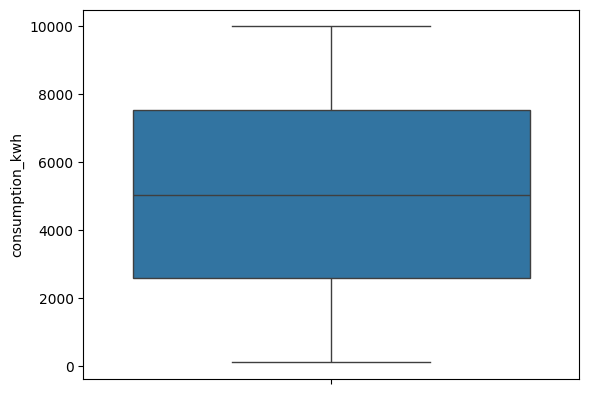

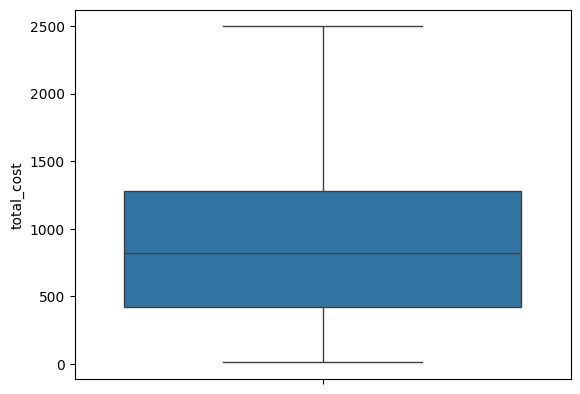

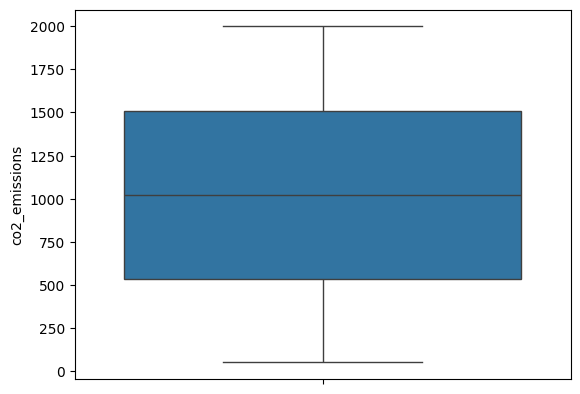

In [ ]:
#Detección de valores atípicos

sns.boxplot(df["consumption_kwh"])
plt.show()

sns.boxplot(df["total_cost"])
plt.show()

sns.boxplot(df["co2_emissions"])
plt.show()

In [ ]:
# Top 5 regiones por consumo total

top_regions = df.groupby("region")["consumption_kwh"].sum().sort_values(ascending=False).head(5).index
df_top = df[df["region"].isin(top_regions)]

# Top 5 tipos de contrato por consumo total

top_contracts = df.groupby("contract_type")["consumption_kwh"].sum().sort_values(ascending=False).head(5).index
df_top = df[df["contract_type"].isin(top_contracts)]

In [ ]:
#Normalizar/ Escalar columnas numéricas

num_cols = ["consumption_kwh", "total_cost", "co2_emissions", "cost_per_kwh"]
scaler = StandardScaler()
df_top[num_cols] = scaler.fit_transform(df_top[num_cols])


In [ ]:
#Guardar el dataset limpio
df.to_csv("Ecoenergy_dataset_limpio2.csv", index=False)

#descargar el archivo limpio
files.download("Ecoenergy_dataset_limpio2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>